In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import data_exploration

In [2]:
# Import train data
data_dir = "./widsdatathon2021/"
training_data_path = data_dir + "TrainingWiDS2021.csv"
data_info_dict = data_dir + "DataDictionaryWiDS2021.csv"
train_df = pd.read_csv(training_data_path, index_col=0)


In [14]:
print(train_df.columns)
print("Num encounters: ", np.shape(train_df)[0])
print("Num features: ", len(train_df.columns) - 1)

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=180)
Num encounters:  130157
Num features:  179


# Training data target variable distribution
* Classification is binary for 'diabetes_mellitus' (dm)
* 27% of data consists of encounters with dm

Number of encounters with dm:  28151
Number of encounters without dm:  102006
with dm / without dm:  0.2759739623159422


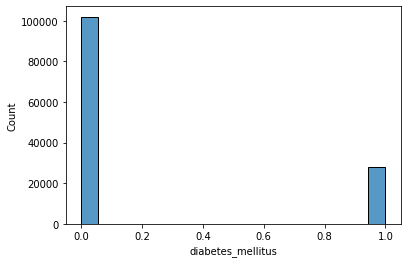

In [8]:
# Plot distribution of target value
sns.histplot(data=train_df, x='diabetes_mellitus')

# Count number of entries without dm and with dm
no_dm_count, has_dm_count = train_df['diabetes_mellitus'].value_counts()

print("Number of encounters with dm: ", has_dm_count)
print("Number of encounters without dm: ", no_dm_count)
print("with dm / without dm: ", has_dm_count / no_dm_count)

# Missing data
* Alot of missing data in the vitals
* Some vitals might only be recorded when specific symptoms are shown
* h1 features refer to vital measurements in first hour of stay in unit
* d1 features refer to vital measurements in first day of stay in unit

In [30]:
# Get dictionary containing number of missing data for each feature
# printed in descending order
missing_data_counts = data_exploration.count_missing_data(train_df);
for key, v in sorted(missing_data_counts.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, v))

h1_bilirubin_max: 119861
h1_bilirubin_min: 119861
h1_albumin_max: 119005
h1_albumin_min: 119005
h1_lactate_max: 118467
h1_lactate_min: 118467
h1_pao2fio2ratio_max: 113397
h1_pao2fio2ratio_min: 113397
h1_arterial_ph_max: 107849
h1_arterial_ph_min: 107849
h1_arterial_pco2_max: 107666
h1_arterial_pco2_min: 107666
h1_arterial_po2_max: 107445
h1_arterial_po2_min: 107445
h1_hco3_max: 106395
h1_hco3_min: 106395
h1_wbc_max: 105986
h1_wbc_min: 105986
h1_calcium_max: 105921
h1_calcium_min: 105921
h1_platelets_max: 105729
h1_platelets_min: 105729
h1_bun_max: 104990
h1_bun_min: 104990
h1_diasbp_invasive_max: 104829
h1_diasbp_invasive_min: 104829
h1_sysbp_invasive_max: 104807
h1_sysbp_invasive_min: 104807
h1_creatinine_max: 104784
h1_creatinine_min: 104784
h1_mbp_invasive_max: 104766
h1_mbp_invasive_min: 104766
h1_hematocrit_max: 102956
h1_hematocrit_min: 102956
h1_hemaglobin_max: 102790
h1_hemaglobin_min: 102790
h1_sodium_max: 101781
h1_sodium_min: 101781
h1_potassium_max: 100821
h1_potassium_min:

# Ideas
* Glucose a vital that needs to be constantly monitored for diabetes
    * Will be regularly recorded for someone with known diabetes

* Diabetes can cause cognitive impairment/coma
    * Glasgow coma scale vitals have prefix gcs_ in records
        * Fewer missing values for these compared with most other vitals

* Lactate is also a biomarker for diabetes 
    
# Questions
* How should we deal with missing data? Maybe we can exclude all the h1 data?

# Preprocessing plans
* String columns 'apache_2_diagnosis',  'apache_3j_diagnosis' are both actually numerical and should be converted

# String features

In [47]:
# 'bmi'
# 'elective_surgery'
# 'ethnicity'
# icu_admit_source
# icu_admit_type
# icu_stay_type
# icu_type

print(train_df['icu_admit_source'].unique())
# print(train_df['icu_admit_type'].unique())
print(train_df['icu_type'].unique())
print(train_df['icu_stay_type'].unique())
print(train_df['icu_stay_type'].unique())
print(train_df['apache_2_diagnosis'].unique())
print(train_df['apache_3j_diagnosis'].unique())


# for k in train_df.keys():
#     print(k)


['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
['admit' 'readmit' 'transfer']
['admit' 'readmit' 'transfer']
[113. 108. 122. 203. 119. 301. 116. 112. 303. 218. 304. 302. 305. 124.
 202. 207. 110. 209. 109. 106. 117. 120.  nan 217. 114. 102. 308. 105.
 212. 219. 306. 121. 214. 123. 213. 208. 101. 118. 307. 215. 103. 115.
 104. 216. 107.]
[5.02010e+02 2.03010e+02 7.03030e+02 1.20603e+03 6.01010e+02 4.03010e+02
 5.01050e+02 1.03010e+02 1.07010e+02 1.30408e+03 1.50502e+03 1.40601e+03
 1.30405e+03 1.09140e+02 4.10010e+02 1.50603e+03 1.70305e+03 5.01060e+02
 3.05010e+02 1.20401e+03 1.60212e+03 1.04010e+02 1.30202e+03 3.05020e+02
 1.08010e+02 2.12010e+02 6.01040e+02 1.06010e+02 4.07010e+02 2.50000e-01
 1.20501e+03 1.50202e+03 2.12020e+02 1.02010e+02 2.06010e+02 3.06010e+02
 1.20701e+03 1.20402e+03 2.07010e+02 1.11010e+02 5.01040e+02 1.40302e+03
 1.50403e+03 4.0